# ベクトル
数を１つ１つバラバラに考えるのではなくいくつかをひとまとめにして考えたものがベクトルである．


In [2]:
import numpy as np   # NumPyパッケージのインポート
import matplotlib.pyplot as plt

In [3]:
#列ベクトル
a=np.array([[1],[2],[3]])
a

array([[1],
       [2],
       [3]])

In [4]:
#行ベクトル
b=np.array([1,2,3])
b

array([1, 2, 3])

In [5]:
#aとcのベクトルの大きさ(ノルム)を求める
c = np.array([[2],[1]])
n = np.linalg.norm(a)
m = np.linalg.norm(c)
print(n)
print(m)

3.7416573867739413
2.23606797749979


In [6]:
#関数を使わずに確認してみる
n2 = (1+4+9)**0.5 #aの大きさ
m2 = (4+1)**0.5 #bの大きさ
print(n2)
print(m2)

3.7416573867739413
2.23606797749979


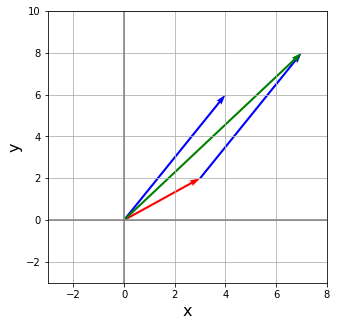

In [24]:
#ベクトルの足し算
a = np.array([[3],[2]])
b = np.array([[4],[6]])

# 座標設定関数
def coordinate(axes, range_x, range_y, grid = True,
               xyline = True, xlabel = "x", ylabel = "y"):
    axes.set_xlabel(xlabel, fontsize = 16)
    axes.set_ylabel(ylabel, fontsize = 16)
    axes.set_xlim(range_x[0], range_x[1])
    axes.set_ylim(range_y[0], range_y[1])
    if grid == True:
        axes.grid()
    if xyline == True:
        axes.axhline(0, color = "gray")
        axes.axvline(0, color = "gray")

# ベクトル描画関数
def visual_vector(axes, loc, vector, color = "red"):
    axes.quiver(loc[0], loc[1],
              vector[0], vector[1], color = color,
              angles = 'xy', scale_units = 'xy', scale = 1)

# FigureとAxes
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)

# 座標を設定
coordinate(ax, [-3, 8], [-3, 10])

# ベクトルv,wを定義
#v = np.array([2, 1])
#w = np.array([-1, 1])

# [0,0]を始点にv1を描画
visual_vector(ax, [0, 0], a, "red")

# v1の終点を始点にｖ2を描画
visual_vector(ax, [0,0], b, "blue")
visual_vector(ax, a, b, "blue")

# [0,0]を始点にa+bを描画
visual_vector(ax, [0, 0], a + b, "green")

plt.show()

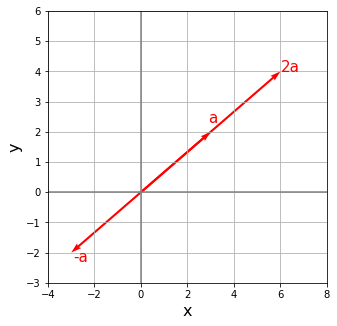

In [25]:
#ベクトルのスカラー倍
a2 = 2*a
a3 = (-1)*a
#a3を特に逆ベクトルと呼ぶ

# FigureとAxes
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)

# 座標を設定
coordinate(ax, [-4, 8], [-3, 6])

# [0,0]を始点にv1を描画
visual_vector(ax, [0, 0], a, "red")
ax.text(a[0]-0.1,a[1]+0.3, "a", color = "red", size = 15)

# [0,0]を始点にv1を描画
visual_vector(ax, [0, 0], 2*a, "red")
ax.text(a2[0],a2[1], "2a", color = "red", size = 15)

# [0,0]を始点にv1を描画
visual_vector(ax, [0, 0], (-1)*a, "red")
ax.text(a3[0]+0.1,a3[1]-0.3, "-a", color = "red", size = 15)

plt.show()

In [26]:
c = a+a3
print(c)

[[0]
 [0]]


In [27]:
d = a+c
print(d)

[[3]
 [2]]


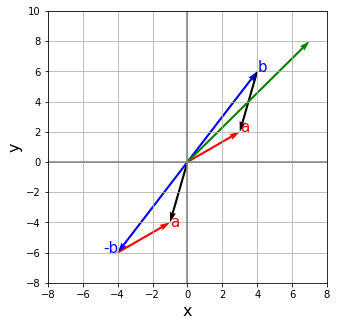

In [43]:
#ベクトルの引き算
# FigureとAxes
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)

# 座標を設定
coordinate(ax, [-8, 8], [-8, 10])

# ベクトルv,wを定義
#v = np.array([2, 1])
#w = np.array([-1, 1])

# [0,0]を始点にv1を描画
visual_vector(ax, [0, 0], a, "red")
ax.text(a[0],a[1], "a", color = "red", size = 15)
visual_vector(ax, (-1)*b, a, "red")
ax.text((a[0]+(-1)*b[0]),(a[1]+(-1)*b[1]-0.3), "a", color = "red", size = 15)

# v1の終点を始点にｖ2を描画
visual_vector(ax, [0,0], b, "blue")
ax.text(b[0],b[1], "b", color = "blue", size = 15)
visual_vector(ax, [0,0], (-1)*b, "blue")
ax.text((-1)*b[0]-0.8,(-1)*b[1], "-b", color = "blue", size = 15)

# [0,0]を始点にa+bを描画
visual_vector(ax, [0, 0], a - b, "black")
visual_vector(ax, b, a - b, "black")
visual_vector(ax, [0, 0], a + b, "green")

plt.show()

Length of e :  1.0


Text([0.83205029], [0.3547002], 'e')

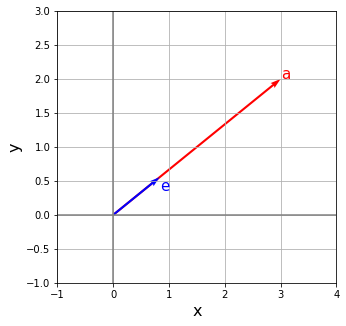

In [49]:
#単位ベクトル
e = (1/np.linalg.norm(a))*a
len_e = np.linalg.norm(e)
print("Length of e : ",len_e)
# FigureとAxes
fig = plt.figure(figsize = (5, 5))
ax = fig.add_subplot(111)

# 座標を設定
coordinate(ax, [-1, 4], [-1, 3])

visual_vector(ax, [0, 0], a, "red")
ax.text(a[0],a[1], "a", color = "red", size = 15)
visual_vector(ax, [0, 0], e, "blue")
ax.text(e[0],e[1]-0.2, "e", color = "blue", size = 15)